In [50]:
import pandas as pd
import pickle 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
with open('results/learn_curve_xp_type_tau_uniform.pkl', 'rb') as f:
    res_uniform_tau = pickle.load(f)

with open('results/learn_curve_xp_type_tau_constant.pkl', 'rb') as f:
    res_constant_tau = pickle.load(f)

#### Figure 1: Loss function per epoch and training and validation sets

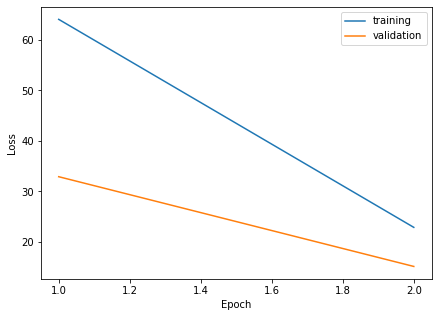

In [18]:
# uniform tau xp
loss_train = np.array(res_constant_tau[0]['loss_supervised_train']) + np.array(res_constant_tau[0]['loss_reg_train'])
loss_valid = np.array(res_constant_tau[0]['loss_supervised_valid']) + np.array(res_constant_tau[0]['loss_reg_valid'])
plt.figure(figsize=(7, 5))
plt.plot(np.arange(1, len(loss_train)+1), loss_train, label='training')
plt.plot(np.arange(1, len(loss_valid)+1), loss_valid, label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Figure 2: Accuracy of model with time constants generated from a random uniform distribution with increasing bounds

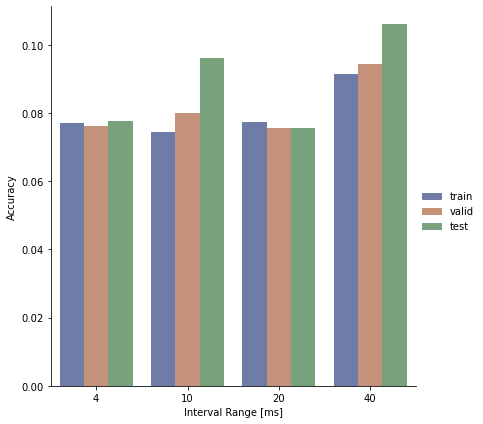

In [86]:
df = pd.DataFrame()
df['test'] = [x['acc_test'] for x in res_uniform_tau]
df['train'] = [x['acc_train'][-1] for x in res_uniform_tau]
df['valid'] = [x['acc_valid'][-1] for x in res_uniform_tau]
df['lower'] = [x['xp_params']['uniform_lower_bounds'][x['i']] for x in res_uniform_tau]
df['upper'] = [x['xp_params']['uniform_upper_bounds'][x['i']] for x in res_uniform_tau]
df['width'] = (round((df['upper'] - df['lower']) * 1e3)).astype(int)
df = df.melt(id_vars=['width'], value_vars=['train', 'valid', 'test'], value_name='acc')

g = sns.catplot(
    data=df, kind="bar",
    x="width", y="acc", hue='variable',
    ci="sd", palette="dark", alpha=.6, height=6
)
g.legend.set_title('')
g.set_axis_labels("Interval Range [ms]", "Accuracy")

#### Figure 3: Accuracy of model with time constants generated from a normal distribution with increasing variance

#### Figure 4: Accuracy of model with increasing homogenous time constants

In [54]:
res_uniform_tau[0].keys()

dict_keys(['w1', 'w2', 'v1', 'weight_scale', 'xp_type', 'xp_params', 'i', 'gen_distribution_tau', 'gen_distribution_beta', 'alpha', 'beta_readout', 'nb_inputs', 'nb_hidden', 'nb_outputs', 'time_step', 'nb_steps', 'max_time', 'batch_size', 'tau_mem_readout', 'tau_syn', 'lr', 'loss_supervised_train', 'loss_supervised_valid', 'loss_reg_train', 'loss_reg_valid', 'acc_test', 'acc_train', 'acc_valid', 'output', 'mem_rec', 'spk_rec'])

In [ ]:
type(spk_rec[0]['output'])

numpy.ndarray

In [22]:
res_uniform_tau[0]['xp_params']['con']

{'constant_tau': array([0.02, 0.04, 0.06, 0.08]), 'num_xps': 4}